In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import chardet

# Detect the encoding
with open("../data/PHP_E_60FR_40W_90A_0B.csv", "rb") as file:
    result = chardet.detect(file.read())
    print(result['encoding'])

UTF-16


In [3]:
# loading raw data
# experiment 60FR 100W DI Water
# DATE: 21 3 2024

# loading thermal data
df_raw_60FR_40W_Therm = pd.read_csv("../data/PHP_T_60FR_40W_90A_0B.csv", encoding='UTF_16',delimiter='\t')

# loading electrical data
df_raw_60FR_40W_Elect = pd.read_csv("../data/PHP_E_60FR_40W_90A_0B.csv", encoding='UTF_16',delimiter='\t')

In [4]:
def process_datetime(df:pd.DataFrame, col:str='date')->pd.DataFrame:
    df[col] = df['DATE'] + df['TIME']
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y%H:%M:%S')
    return df

def join_thermal_electrical_data(df_thermal:pd.DataFrame, df_electrical:pd.DataFrame)->pd.DataFrame:
    df_join = pd.merge(left=df_thermal, right=df_electrical, on=['date', 'TIME', 'DATE'])
    df_join.dropna(axis=1, how='all', inplace=True)
    df_join.dropna(axis=0, how='any', inplace=True)
    df_join.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
    return df_join

def load_meta_table(path:str='../data/meta_table_data.csv'):
    # csv load
    df = pd.read_csv(path)
    return df

In [5]:
df_raw_60FR_40W_Elect = process_datetime(df_raw_60FR_40W_Elect)
df_raw_60FR_40W_Therm = process_datetime(df_raw_60FR_40W_Therm)

In [6]:
df_raw_60FR_40W = join_thermal_electrical_data(df_thermal=df_raw_60FR_40W_Therm,
                                                df_electrical=df_raw_60FR_40W_Elect)

In [7]:
df_raw_60FR_40W.set_index('date')

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,TC_9,PRESSURE,HEATER,HEATER SET POINT,voltage,current,power
date,,,,,,,,,,,,,,,,,
2024-03-21 18:40:54,18:40:54,21/03/2024,76.6,76.6,76.4,77.2,77.0,36.0,36.8,38.2,36.1,-0.01,95,170,0.0,0.000,0.0
2024-03-21 18:40:55,18:40:55,21/03/2024,76.4,76.5,76.3,77.0,76.8,36.0,36.8,38.2,36.1,-0.01,95,170,0.0,0.000,0.0
2024-03-21 18:40:56,18:40:56,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,35.8,-0.01,95,170,0.0,0.000,0.0
2024-03-21 18:40:57,18:40:57,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,35.8,-0.01,95,170,0.0,0.000,0.0
2024-03-21 18:40:58,18:40:58,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,35.8,-0.01,95,170,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-06 12:09:00,12:09:00,06/04/2024,84.3,83.7,84.8,85.2,85.9,38.0,36.2,34.8,31.6,0.05,110,170,52.4,0.775,40.8
2024-04-06 12:09:01,12:09:01,06/04/2024,84.3,83.7,84.8,85.2,85.4,37.9,36.6,34.9,31.6,0.05,110,170,52.4,0.775,40.7
2024-04-06 12:09:02,12:09:02,06/04/2024,84.3,83.7,84.8,85.2,85.4,37.9,36.6,34.9,31.6,0.03,110,170,52.4,0.775,40.7


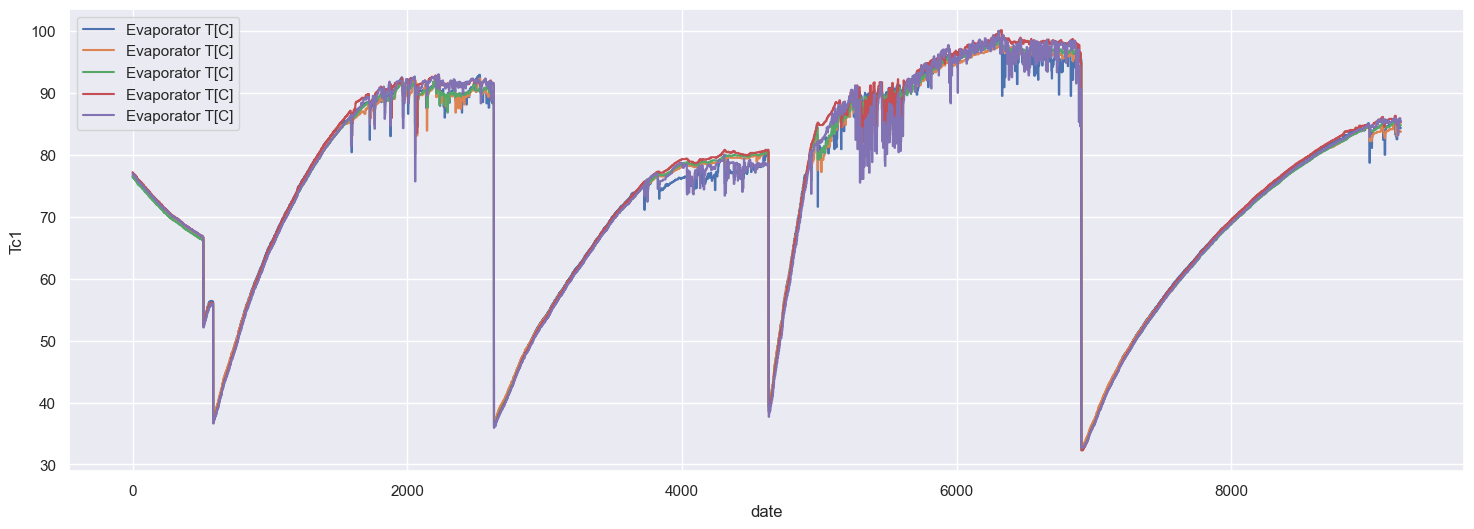

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_40W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']], label=f'Evaporator T[C]')
plt.xlabel('date')
plt.ylabel('Tc1')
# plt.xlim(0,2600)
plt.legend()
plt.show()

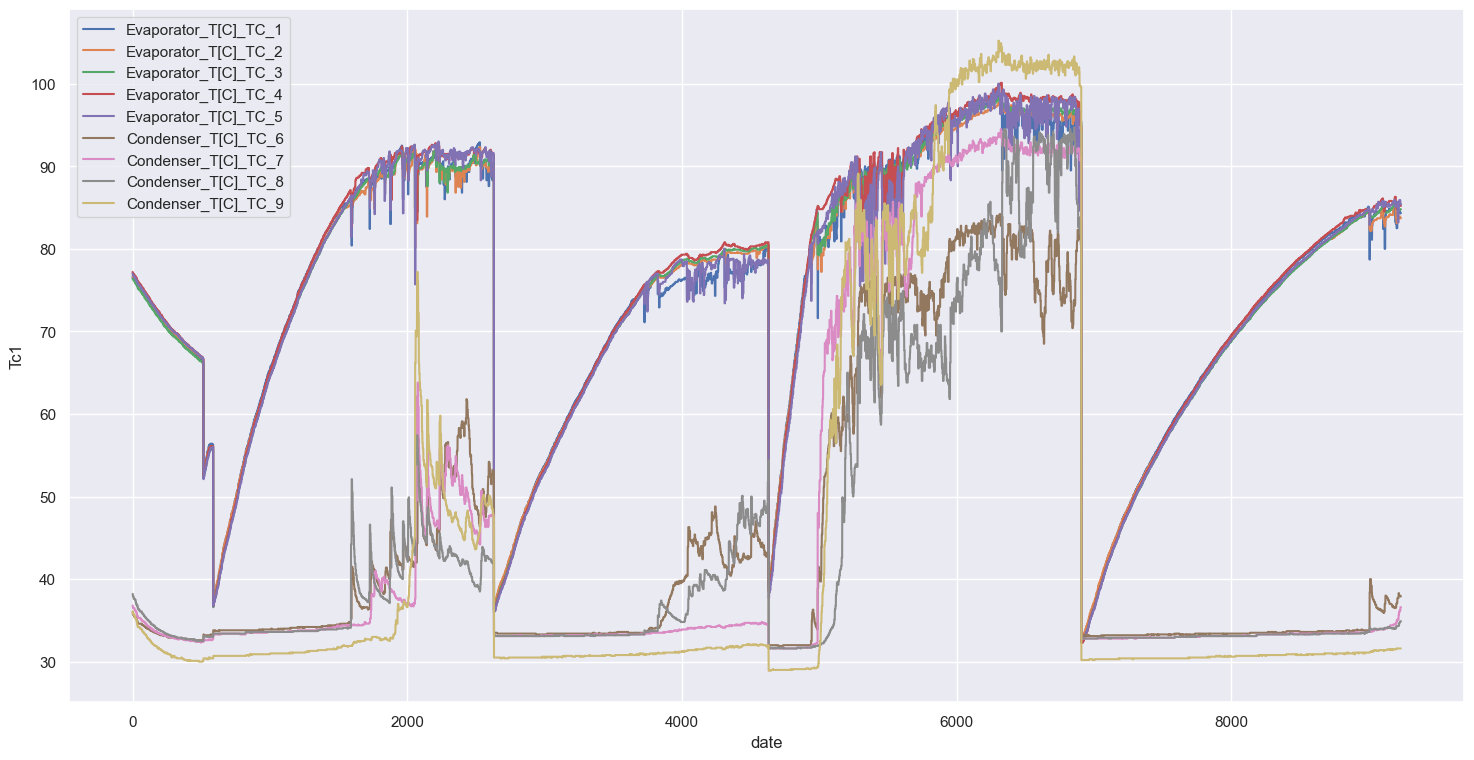

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
for tc in df_raw_60FR_40W.columns.to_list():
    if tc.startswith("TC_"):
        if tc.split('_')[1] in ['6', '7', '8', '9']:
            e = 'Condenser'
            c = 'b'
        else:
            e = 'Evaporator'
            c = 'r'
        plt.plot(df_raw_60FR_40W[tc], label=f'{e}_T[C]_{tc}')
plt.xlabel('date')
plt.ylabel('Tc1')
# plt.xlim(0,2600)
plt.legend()

plt.show()

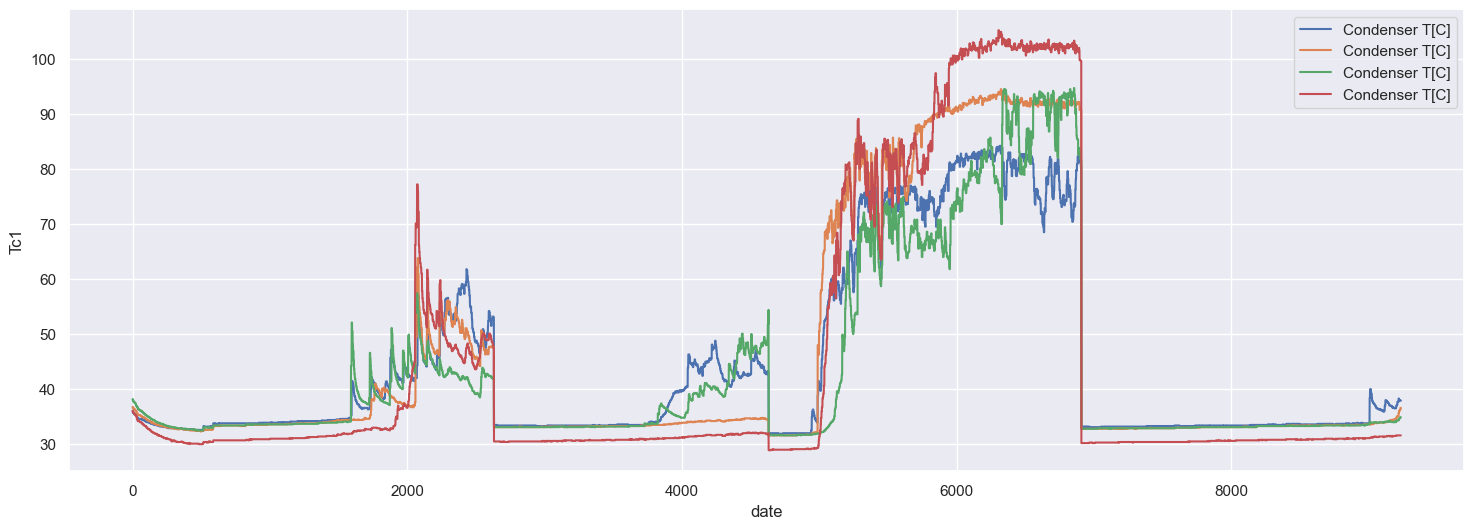

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_40W[['TC_6','TC_7','TC_8', 'TC_9']], label='Condenser T[C]')
plt.xlabel('date')
plt.ylabel('Tc1')
# plt.xlim(0,2600)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


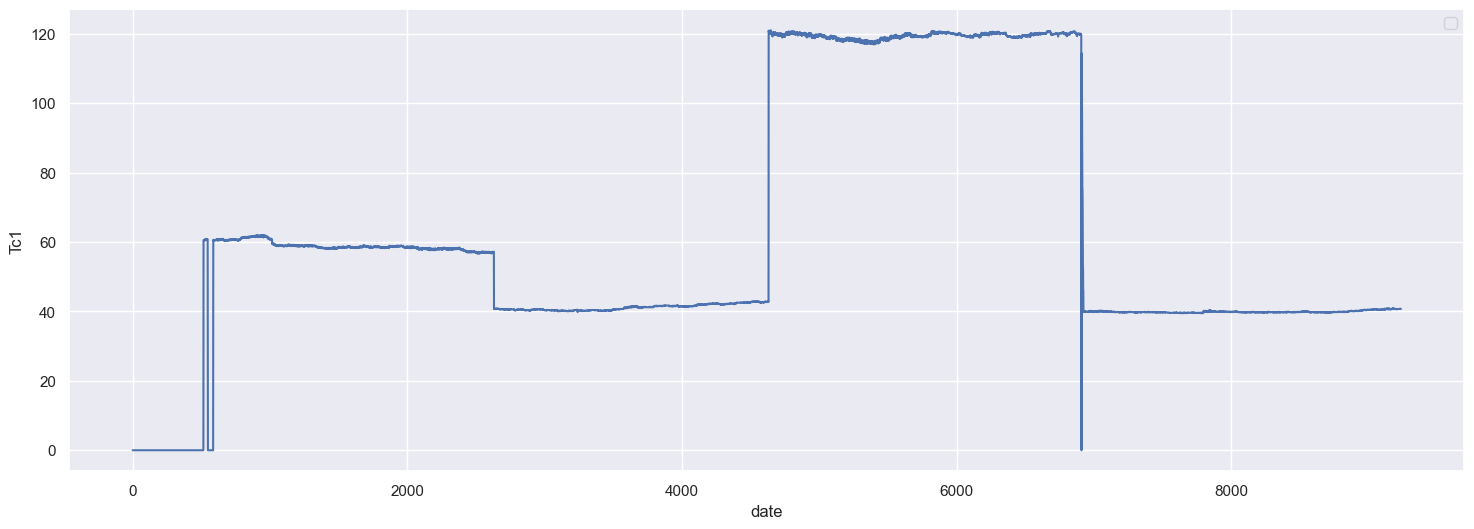

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df_raw_60FR_40W['power'])
plt.xlabel('date')
plt.ylabel('Tc1')
plt.legend()
plt.show()

In [12]:
df_raw_60FR_40W['Te_mean'] = df_raw_60FR_40W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']].mean(axis=1)
df_raw_60FR_40W['Tc_mean'] = df_raw_60FR_40W[['TC_6','TC_7','TC_8', 'TC_9']].mean(axis=1)
df_raw_60FR_40W['Te_std'] = df_raw_60FR_40W[['TC_1', 'TC_2', 'TC_3', 'TC_4', 'TC_5']].std(axis=1)
df_raw_60FR_40W['Tc_std'] = df_raw_60FR_40W[['TC_6','TC_7','TC_8', 'TC_9']].std(axis=1)
df_raw_60FR_40W.head()

,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,TC_8,...,HEATER,HEATER SET POINT,date,voltage,current,power,Te_mean,Tc_mean,Te_std,Tc_std
1,18:40:54,21/03/2024,76.6,76.6,76.4,77.2,77.0,36.0,36.8,38.2,...,95,170,2024-03-21 18:40:54,0.0,0.0,0.0,76.76,36.775,0.328634,1.014479
2,18:40:55,21/03/2024,76.4,76.5,76.3,77.0,76.8,36.0,36.8,38.2,...,95,170,2024-03-21 18:40:55,0.0,0.0,0.0,76.60,36.775,0.291548,1.014479
3,18:40:56,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,...,95,170,2024-03-21 18:40:56,0.0,0.0,0.0,76.60,36.475,0.291548,1.014479
4,18:40:57,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,...,95,170,2024-03-21 18:40:57,0.0,0.0,0.0,76.60,36.475,0.291548,1.014479
5,18:40:58,21/03/2024,76.4,76.5,76.3,77.0,76.8,35.7,36.5,37.9,...,95,170,2024-03-21 18:40:58,0.0,0.0,0.0,76.60,36.475,0.291548,1.014479


In [13]:
df_raw_60FR_40W.reset_index(inplace=True)

In [14]:
# load meta table
df_meta_table = pd.read_csv('../data/meta_table_data.csv')
df_meta_table.drop(index=([i for i in range(10,24)]), inplace=True)
df_meta_table.fillna(0, inplace=True)


In [15]:

df_meta_table['dt_start'] = df_meta_table['Date'] + df_meta_table['t_start']

df_meta_table['dt_stop'] = df_meta_table['Date'] + df_meta_table['t_end']

df_meta_table['dt_start'] = pd.to_datetime(df_meta_table['dt_start'], format='%d-%m-%Y%H:%M:%S')

df_meta_table['dt_stop'] = pd.to_datetime(df_meta_table['dt_stop'], format='%d-%m-%Y%H:%M:%S')

In [16]:
df_raw_60FR_40W.set_index('date', inplace=True)

In [17]:
df_meta_table

,experiment name,Date,t_start,t_pulse_start,t_end,WF,FR [%],Q [W],alpha,beta,dt_start,dt_stop
0,php,06-04-2024,14:20:48,0.0,15:22:00,DI water,40.0,40.0,90.0,0.0,2024-04-06 14:20:48,2024-04-06 15:22:00
1,php,06-04-2024,10:25:31,0.0,11:25:00,DI water,40.0,60.0,90.0,0.0,2024-04-06 10:25:31,2024-04-06 11:25:00
2,php,06-04-2024,13:30:08,0.0,14:30:00,DI water,40.0,80.0,90.0,0.0,2024-04-06 13:30:08,2024-04-06 14:30:00
3,php,06-04-2024,16:20:59,0.0,17:20:00,DI water,40.0,100.0,90.0,0.0,2024-04-06 16:20:59,2024-04-06 17:20:00
4,php,06-04-2024,10:19:09,0.0,11:20:00,DI water,40.0,120.0,90.0,0.0,2024-04-06 10:19:09,2024-04-06 11:20:00
5,php,04-04-2024,11:32:05,0.0,12:35:00,DI water,60.0,40.0,90.0,0.0,2024-04-04 11:32:05,2024-04-04 12:35:00
6,php,03-04-2024,12:55:21,0.0,13:51:01,DI water,60.0,60.0,90.0,0.0,2024-04-03 12:55:21,2024-04-03 13:51:01
7,php,21-03-2024,14:07:55,0.0,15:34:00,DI water,60.0,80.0,90.0,0.0,2024-03-21 14:07:55,2024-03-21 15:34:00
8,php,21-03-2024,17:12:31,0.0,18:20:01,DI water,60.0,100.0,90.0,0.0,2024-03-21 17:12:31,2024-03-21 18:20:01
9,php,04-04-2024,16:32:36,0.0,17:35:00,DI water,60.0,120.0,90.0,0.0,2024-04-04 16:32:36,2024-04-04 17:35:00


In [18]:
df_selected_frame = []
for index, row in df_meta_table.iterrows():
    experiment_start = row['dt_start']
    experiment_stop = row['dt_stop']
    df_sd = df_raw_60FR_40W.loc[experiment_start:experiment_stop]
    df_sd['WF'] = row['WF']
    df_sd['FR[%]'] = row['FR [%]']
    df_sd['Q[W]'] = row['Q [W]']
    df_sd['alpha'] = row['alpha']
    df_sd['beta'] = row['beta']
    df_selected_frame.append(df_sd)
    
df_data = pd.concat(df_selected_frame, ignore_index=True)

/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_28420/1766376776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['WF'] = row['WF']
/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_28420/1766376776.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['FR[%]'] = row['FR [%]']
/var/folders/qf/2jw75py95_q8c1t5jmt77sx80000gn/T/ipykernel_28420/1766376776.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [19]:
df_data = process_datetime(df=df_data, col='date')

In [24]:
df_data['Q[W]'].value_counts()

Q[W]
120.0    2715
60.0     2681
40.0     1883
Name: count, dtype: int64

In [25]:
df_data

,index,TIME,DATE,TC_1,TC_2,TC_3,TC_4,TC_5,TC_6,TC_7,...,Te_mean,Tc_mean,Te_std,Tc_std,WF,FR[%],Q[W],alpha,beta,date
0,6909,11:02:34,06/04/2024,32.7,33.0,32.3,32.3,32.7,33.1,32.8,...,32.60,32.225,0.300000,1.357387,DI water,40.0,60.0,90.0,0.0,2024-04-06 11:02:34
1,6910,11:02:35,06/04/2024,32.7,33.0,32.3,32.3,32.7,33.1,32.8,...,32.60,32.225,0.300000,1.357387,DI water,40.0,60.0,90.0,0.0,2024-04-06 11:02:35
2,6911,11:02:38,06/04/2024,32.7,33.0,32.3,32.3,32.7,33.1,32.8,...,32.60,32.225,0.300000,1.357387,DI water,40.0,60.0,90.0,0.0,2024-04-06 11:02:38
3,6912,11:02:39,06/04/2024,32.7,33.0,32.3,32.3,32.7,33.1,32.8,...,32.60,32.225,0.300000,1.357387,DI water,40.0,60.0,90.0,0.0,2024-04-06 11:02:39
4,6913,11:02:40,06/04/2024,32.7,33.0,32.3,32.3,32.7,33.1,32.8,...,32.60,32.225,0.300000,1.357387,DI water,40.0,60.0,90.0,0.0,2024-04-06 11:02:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,6759,17:34:52,04/04/2024,94.4,96.2,96.7,98.2,98.2,73.8,92.2,...,96.74,89.525,1.583667,11.944699,DI water,60.0,120.0,90.0,0.0,2024-04-04 17:34:52
7275,6760,17:34:53,04/04/2024,94.5,96.3,97.0,98.5,98.2,73.8,92.2,...,96.90,89.525,1.610900,11.944699,DI water,60.0,120.0,90.0,0.0,2024-04-04 17:34:53
7276,6761,17:34:55,04/04/2024,94.5,96.3,97.0,98.5,97.9,74.1,92.5,...,96.84,89.550,1.554992,11.842719,DI water,60.0,120.0,90.0,0.0,2024-04-04 17:34:55
7277,6762,17:34:59,04/04/2024,94.5,96.3,97.0,98.5,97.9,74.1,92.5,...,96.84,89.425,1.554992,11.658866,DI water,60.0,120.0,90.0,0.0,2024-04-04 17:34:59


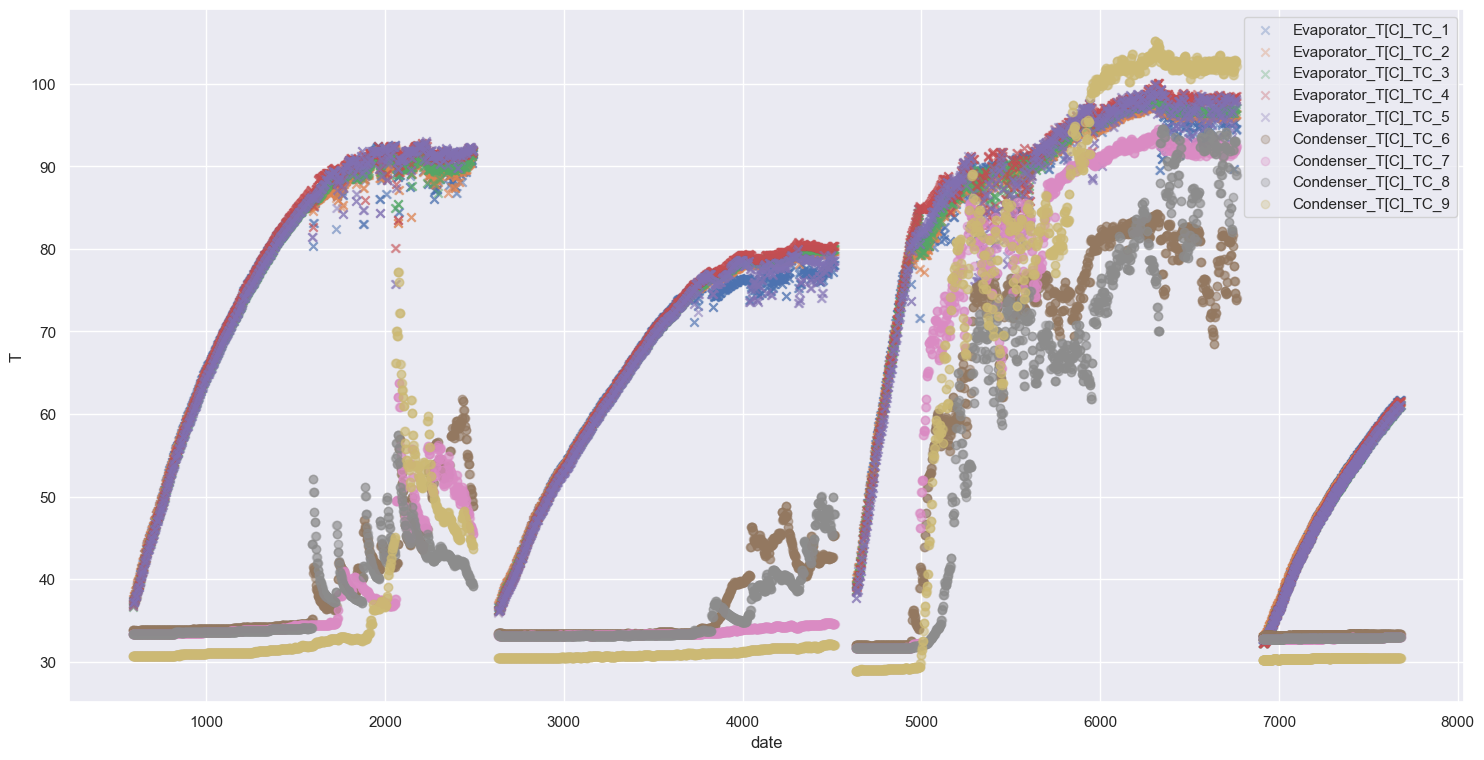

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 9))
for tc in df_data.columns.to_list():
    if tc.startswith("TC_"):
        if tc.split('_')[1] in ['6', '7', '8', '9']:
            e = 'Condenser'
            c = 'o'
        else:
            e = 'Evaporator'
            c = 'x'
        plt.scatter(x=df_data['index'] ,y=df_data[tc], label=f'{e}_T[C]_{tc}', alpha=0.3, marker=c)
# Correct datetime parsing and plotting a single point
# x1 = [pd.to_datetime('04-04-2024 11:58:10', format='%d-%m-%Y %H:%M:%S')]
# x2 = [pd.to_datetime('04-04-2024 14:22:10', format='%d-%m-%Y %H:%M:%S')]
# plt.axvline(x=x1, color='r')
# plt.axvline(x=x2, color='r')
plt.xlabel('date')
plt.ylabel(f'T')
# plt.xlim(0,2600)
plt.legend()

plt.show()